# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     716.7
Date:                Thu, 31 Aug 2023   Prob (F-statistic):           1.32e-38
Time:                        18:14:02   Log-Likelihood:                -4.8847
No. Observations:                  50   AIC:                             17.77
Df Residuals:                      46   BIC:                             25.42
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0774      0.095     53.554      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.60802174  5.0953634   5.54105594  5.91552146  6.19985657  6.38893817
  6.49226515  6.53239773  6.54125094  6.55485099  6.60741635  6.72573568
  6.92476656  7.20517803  7.5532406   7.94308203  8.34093804  8.71069968
  9.01984595  9.24478687  9.37473929  9.41349851  9.37881472  9.2994767
  9.21058191  9.14777005  9.14136761  9.21140526  9.3643269   9.59193092
  9.87271774 10.17542208 10.46414982 10.70427523 10.86812992 10.93954871
 10.91652543 10.81154264 10.64952069 10.46372343 10.29029302 10.16231191
 10.10436747 10.12851232 10.2322842  10.39911044 10.60103081 10.80329137
 10.97005435 11.07028627]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[11.07252112 10.9329115  10.67274093 10.34051186 10.0000706   9.71497547
  9.53293557  9.47412986  9.5262667   9.64759325]


## Plot comparison

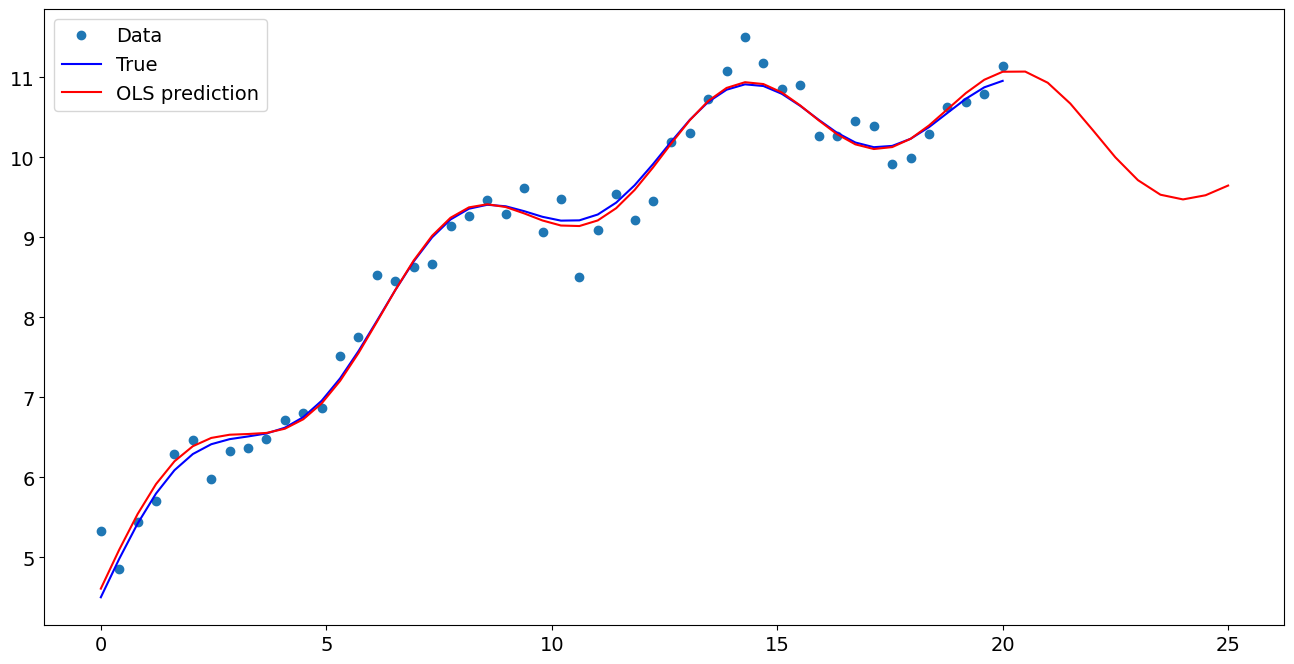

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           5.077439
x1                  0.486106
np.sin(x1)          0.542722
I((x1 - 5) ** 2)   -0.018777
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    11.072521
1    10.932911
2    10.672741
3    10.340512
4    10.000071
5     9.714975
6     9.532936
7     9.474130
8     9.526267
9     9.647593
dtype: float64